Weihao Li

# MTH9879 Homework 1

Assigned: January 31, 2017.
Due: February 14, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

#### Question 1:
This strategy is to attenuate the impact on price when an order is executed. It uses the total volumn of trades in a given time to determinae a "constant participation rate".Based on this rate, the system splits the parent order into child orders and executes them.
#### Question 2:
Since the parent order was a vary large order, so as its child orders. When child orders were executed, the trading volumn in a given time increased, so as the "constant participation rate". Based on this new information, an even larger child orderds was executed, which, again, increased the volumn. This self-driven effect finally pulled the price down and created systematic flash crash.
#### Question 2:
Amendment 1:
Make the strategy contingent on the price: The trader need to find a way to measure the market impact of executed orders.If the impact is large, he/she should have traded for smaller size.  
Amendment 2:
Distinguish between orders: since the number of orders executed is based on the total trading volumn on the market, a large order will have large effect on the volumn, so as to the next execution. If the trader can make the execution contingent on volumn executed by others rather than on the total volumn,this strategy will have a much smaller self-driven effect. 

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

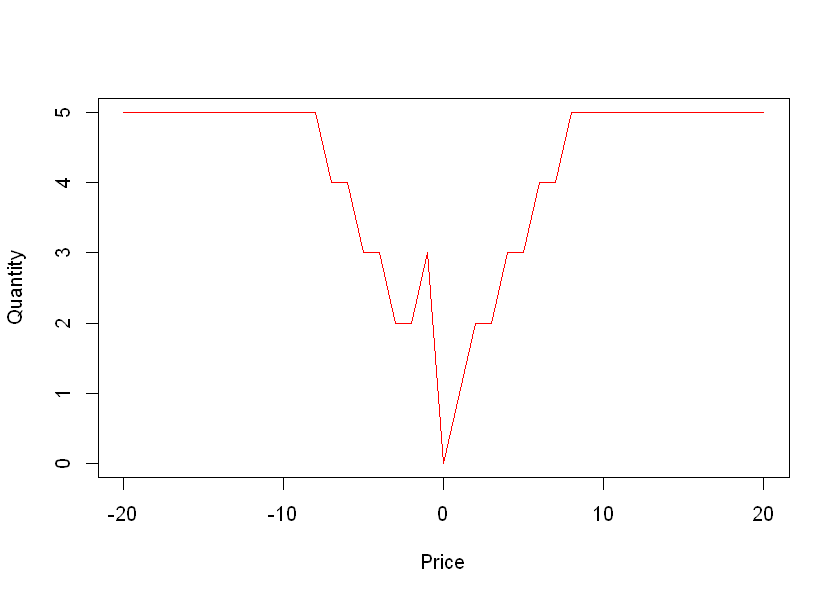

In [25]:
#R x64 3.3.2
logging <- F
#imput parameters
alpha <- 1;
mu <- 10;
delta <- 0.2;
#initialize orderbook
initializeBook5()
# Place an order at price -1
limitBuyOrder(-1)
limitBuyOrder(-1)
#plot
bookPlot(20) 

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

#### Answer for Question a 

In [3]:
#R x64 3.3.2


# turned off the logging and set up parameters
logging <- F
alphas <<- c(rep(1,4))
mus  <<- c(10,8,10,10)
deltas <<- c(1.0/5,1.0/5,1.0/6,1.0/8)
#save data into the avgBookShape
#each row is a book shape

avgBookShape <<- array(0,c(4,41))

#begin looping for 4 group
for (j in 1:4){
    alpha <<- alphas[j]
    mu  <<- mus[j]
    delta <<- deltas[j]
    
    #set up the beginning state
    for(count in 1:100){
      generateEvent()
    }
    
    #begin simulation
    numEvents <- 100000 
    BookShape_Temp <- bookShape(20)/numEvents
    #compute the simulated price 
    for(count in 2:numEvents){
      generateEvent()
      BookShape_Temp <- BookShape_Temp + bookShape(20)/numEvents
    }
    
    avgBookShape[j,] <- BookShape_Temp
    
}



#### Answer for Question b

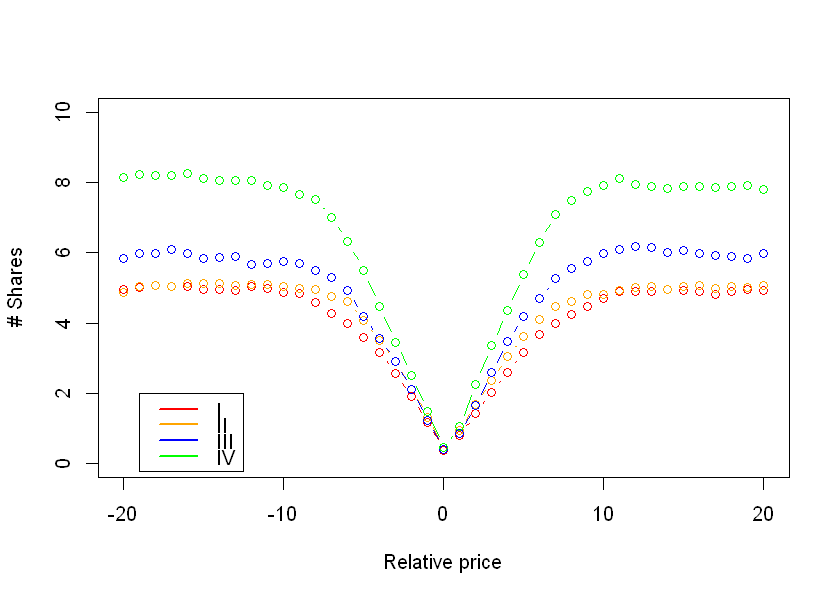

In [10]:
#R x64 3.3.2
#Plot Those BookShapes

library(repr)
options(repr.plot.height=5)

colours <- c('red','orange','blue','green')

plot(-20:20,avgBookShape[1,],main=NA,xlab="Relative price",ylab="# Shares", col=colours[1], type='b',ylim=c(0, 10))
for(i in 1:4){
    
    lines(-20:20,avgBookShape[i,],main=NA,xlab="Relative price",ylab="# Shares", col=colours[i], type='b')
    
}

legend(-19,2,c("I","II","III","IV"),lty=1, lwd = 2, col=colours) 



#### Answer for Question c

In [13]:
#R x64 3.3.2
slopes <-c(0,0,0,0)
#get the slope by finite difference
for (i in 1:4){
    slopes[i] <- (avgBookShape[i,16]+avgBookShape[i,26]-2*avgBookShape[i,21])/10
    }

slope_predict = alphas*alphas/mus/deltas

print(slopes)
print(slope_predict )

[1] 0.598006 0.677190 0.754527 1.000004
[1] 0.500 0.625 0.600 0.800


##### AS computed above, the experimental values of slopes are:
Predictions|Experimental Data|Ratio
-----:|-----:|-----:|
0.5| 0.599|0.83
 0.625| 0.686|0.91   
 0.6| 0.737|0.81   
0.8|0.974|0.84    
As showed in the plot the,these two sets of data are closed



#### Answer for Question d

As indicated in the picture, the asymptotic book depths is 5,5,6,8 compared to the predictions: 5,5,6,8( $\frac\alpha\delta$.)

### The following code sets up the data required for Problem 4.

In [14]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

#### Asnwer for Question a

In [28]:
#R x64 3.3.2
#(a) find the mean and standard deviation for mid price

n <- 10 # the length of the list

MeanMid <-rep(0,10)
StdMid  <-rep(0,10)

#compute the mid price and the standard deviation 
for (i in 1:10){
        book_temp <- ziSimResults[[i]]
        mids  <- (book_temp$a+book_temp$b)/2
        MeanMid[i] <- mean(mids)
        StdMid[i] <- sd(mids)/sqrt(length(mids))
}

Mid_DataFrame <- data.frame(MeanMid,StdMid)
print(Mid_DataFrame)

   MeanMid      StdMid
1  0.00590 0.015379863
2  0.21550 0.014316301
3  0.41350 0.013108355
4  0.56635 0.012291150
5  0.66850 0.011233583
6  0.74110 0.010380166
7  0.80530 0.010190907
8  0.80955 0.009888385
9  0.83880 0.009779878
10 0.83435 0.009617315


#### Asnwer for Question b

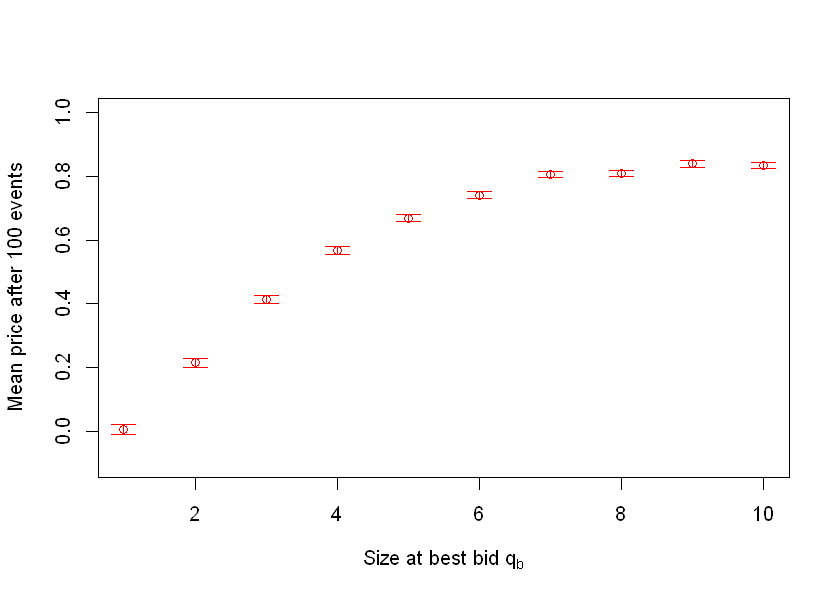

In [18]:
#R x64 3.3.2
plot(1:10,MeanMid,main=NA,xlab=expression(paste("Size at best bid ",q[b])),ylab="Mean price after 100 events", col=colours[1],ylim=c(-0.1, 1))

# error bars
arrows(1:10,MeanMid+StdMid,1:10,MeanMid-StdMid,angle=90,code=3,length=0.1,col="red")

#### Asnwer for Question c

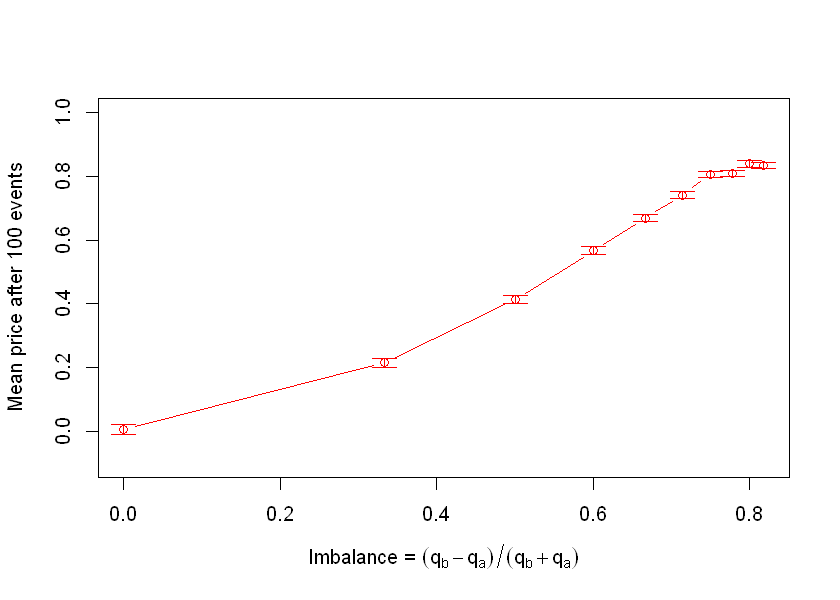

In [24]:
#R x64 3.3.2
#order book imbalance
I <- (0:9)/(2:11)

plot(I,MeanMid,main=NA,type ="b",xlab=expression(paste("Imbalance = ",(q[b]-q[a]))/(q[b]+q[a])),ylab="Mean price after 100 events", col=colours[1],ylim=c(-0.1, 1))

# error bars
arrows(I,MeanMid+StdMid,I,MeanMid-StdMid,angle=90,code=3,length=0.1,col="red")

#### Asnwer for Question d
As indicated from the plot above, the price is expected to increase.

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

1. To Say the market price to be a magingale is equivalent to say they are weak-form efficient. In this case, the pass information will not have effect on the expeatation of future price. However, as we have showed in the above exercise, we have already showed that the imbalance at the previous state will definitly have effect on the future trend. So the martingal assumption is not consistent with my understanding.  
2. Moreover, as we knew from the example we have read for quetsion (1) and from behavious finance, people or strategy's expectation, risk tolerent on the market price, and their reaction towards the market price will definitly have effect on the market price. Thus, the passed and current market prices are correlated.
3. The influences of the market price are also cross market. As we have read from Chapter 1 of Market Liquidity, an order execution in one market will exausted the liquidity in another maket, so the market price of an asset is not an independent process, but related to price in other markets. 








